# Cargamos Librerias

In [82]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Cargamos el dataset compuesto por los partidos de la Primera División y el total de goles de Colo-Colo mientras Maximiliano Falcón jugaba

In [92]:
df = pd.read_csv("Libro1.xlsx - Hoja1 (1).csv")
df

,Partido,Fecha,Equipo rival,Goles del Colo-Colo,Golesacumulados
0,1,7/2/2022,CD Everton,2,2
1,2,13/2/2022,La Serena,1,3
2,3,19/2/2022,Audax Italiano,1,4
3,4,27/2/2022,Huachipato,0,4
4,5,6/3/2022,U. de Chile,4,8
5,6,14/3/2022,Antofagasta,1,9
6,7,20/3/2022,Palestino,5,14
7,8,1/4/2022,La Calera,4,18
8,9,10/4/2022,Unión Española,1,19
9,10,18/4/2022,Cobresal,2,21


In [93]:
df.describe

<bound method NDFrame.describe of     Partido      Fecha    Equipo rival  Goles del Colo-Colo  Golesacumulados
0         1   7/2/2022      CD Everton                    2                2
1         2  13/2/2022       La Serena                    1                3
2         3  19/2/2022  Audax Italiano                    1                4
3         4  27/2/2022      Huachipato                    0                4
4         5   6/3/2022     U. de Chile                    4                8
5         6  14/3/2022     Antofagasta                    1                9
6         7  20/3/2022       Palestino                    5               14
7         8   1/4/2022       La Calera                    4               18
8         9  10/4/2022  Unión Española                    1               19
9        10  18/4/2022        Cobresal                    2               21
10       11  24/4/2022     U. Catolica                    1               22
11       12  10/5/2022    Curicó Unido    

<AxesSubplot:xlabel='Partido', ylabel='Golesacumulados'>

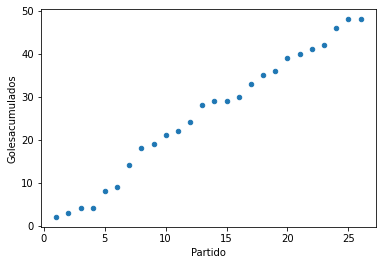

In [85]:
df.plot.scatter(x="Partido", y="Golesacumulados")

# Generamos la regresión lineal y la predicción


In [94]:
reg = LinearRegression()
reg.fit(df[["Partido"]], df["Golesacumulados"])

LinearRegression()

In [95]:
reg.predict([[25],[50]])

D:\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([47.94974359, 96.00102564])

In [96]:
pred = pd.Series(reg.predict(df[["Partido"]]))
pred

0      1.820513
1      3.742564
2      5.664615
3      7.586667
4      9.508718
5     11.430769
6     13.352821
7     15.274872
8     17.196923
9     19.118974
10    21.041026
11    22.963077
12    24.885128
13    26.807179
14    28.729231
15    30.651282
16    32.573333
17    34.495385
18    36.417436
19    38.339487
20    40.261538
21    42.183590
22    44.105641
23    46.027692
24    47.949744
25    49.871795
dtype: float64

# Agregamos la predicción al dataset

In [89]:
df["Pred. Goles acumulados"] = pred
df

,Partido,Fecha,Equipo rival,Goles del Colo-Colo,Golesacumulados,Pred. Goles acumulados
0,1,7/2/2022,CD Everton,2,2,1.820513
1,2,13/2/2022,La Serena,1,3,3.742564
2,3,19/2/2022,Audax Italiano,1,4,5.664615
3,4,27/2/2022,Huachipato,0,4,7.586667
4,5,6/3/2022,U. de Chile,4,8,9.508718
5,6,14/3/2022,Antofagasta,1,9,11.430769
6,7,20/3/2022,Palestino,5,14,13.352821
7,8,1/4/2022,La Calera,4,18,15.274872
8,9,10/4/2022,Unión Española,1,19,17.196923
9,10,18/4/2022,Cobresal,2,21,19.118974


<AxesSubplot:xlabel='Partido', ylabel='Golesacumulados'>

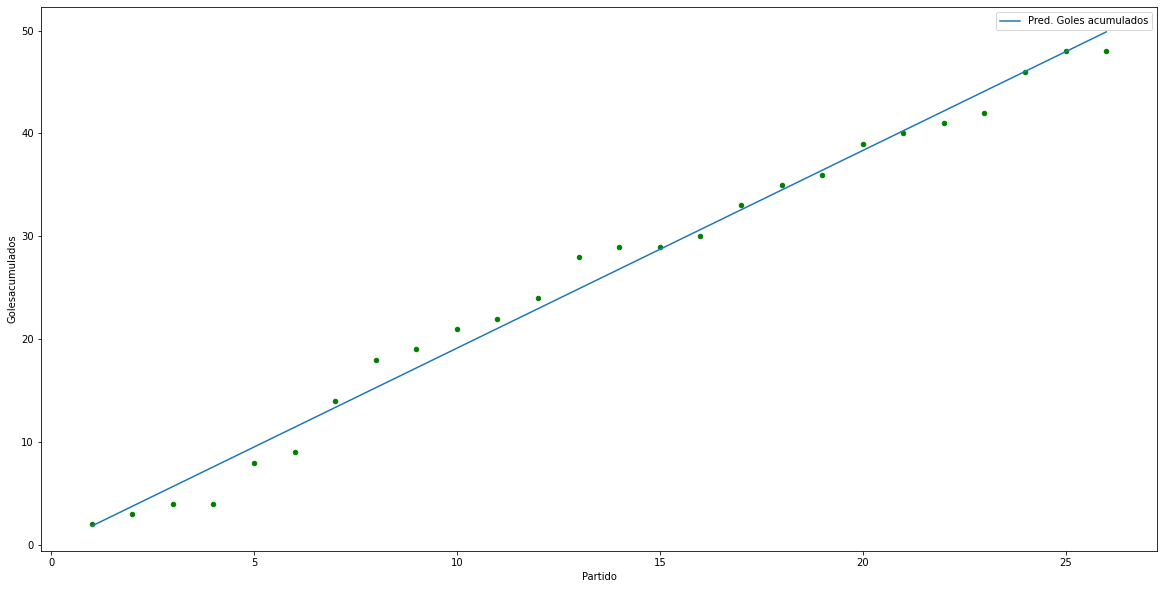

In [90]:
ax = df.plot.line(x="Partido", y="Pred. Goles acumulados")
df.plot.scatter(x="Partido", y="Golesacumulados", ax= ax, color="green", figsize=(20,10))

# Generamos la regresión de R cuadrado

In [91]:
lm = smf.ols(formula="Partido~Golesacumulados", data= df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Partido   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1950.
Date:                Sat, 08 Oct 2022   Prob (F-statistic):           1.69e-24
Time:                        00:18:04   Log-Likelihood:                -31.953
No. Observations:                  26   AIC:                             67.91
Df Residuals:                      24   BIC:                             70.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2163      0.345      0.627      0.537      -0.496       0.928
Golesacumulados     0.5140      0.012     44.158      0.000       0.490       0.538
==============================================================================
Omnibus:                        0.073   Durbin-Watson:                   0.737
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.295
Skew:                          -0.011   Prob(JB):                        0.863
Kurtosis:                       2.478   Cond. No.                         60.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""